In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Mount a drive for uploading content
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/UdeSA 2025/Salaries.csv'
df_salaries = pd.read_csv(file_path)

In [ ]:
df_salaries.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
# -----------------------
# Basic EDA - Quick Overview
# -----------------------

print("Basic EDA")
print("--------------------------------------------------------------")

# 1. Shape of the dataset
print("📊 Number of rows and columns:", df_salaries.shape)
print("--------------------------------------------------------------")

# 2. Data types
print("\n📁 Column data types:\n", df_salaries.dtypes)
print("--------------------------------------------------------------")

# 3. Missing values per column
print("\n🔍 Missing values per column:\n", df_salaries.isnull().sum())
print("--------------------------------------------------------------")

# 4. Number of completely empty rows
empty_rows = df_salaries.isnull().all(axis=1).sum()
print(f"\n⚠️ Number of completely empty rows: {empty_rows}")
print("--------------------------------------------------------------")

# 5. Unique values in key columns
print("\n🔑 Unique values in key columns:")
for col in ["rank", "discipline", "yrs.since.phd", "yrs.service"]:
    print(f"- {col}: {df_salaries[col].nunique()} unique values")
print("--------------------------------------------------------------")


Basic EDA
--------------------------------------------------------------
📊 Number of rows and columns: (397, 7)
--------------------------------------------------------------

📁 Column data types:
 Unnamed: 0        int64
rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object
--------------------------------------------------------------

🔍 Missing values per column:
 Unnamed: 0       0
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64
--------------------------------------------------------------

⚠️ Number of completely empty rows: 0
--------------------------------------------------------------

🔑 Unique values in key columns:
- rank: 3 unique values
- discipline: 2 unique values
- yrs.since.phd: 53 unique values
- yrs.service: 52 unique values
--------------------------------------------------------------

In [ ]:
df_salaries.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

In [ ]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


In [ ]:
df_salaries.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


In [ ]:
# Statistics
df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].mean()


,0
yrs.since.phd,21.0
yrs.service,16.0
salary,107300.0


In [ ]:
df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].median()

,0
yrs.since.phd,21.0
yrs.service,16.0
salary,107300.0


In [ ]:
df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].mode()

,yrs.since.phd,yrs.service,salary
0,4,3,92000


In [ ]:
df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].std()

,0
yrs.since.phd,12.887003
yrs.service,13.006024
salary,30289.038695


In [ ]:
df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].quantile(q=0.1)

,0.1
yrs.since.phd,5.0
yrs.service,3.0
salary,77380.8


In [ ]:
df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].quantile(q=0.9)

,0.9
yrs.since.phd,40.0
yrs.service,37.0
salary,152946.0


In [ ]:
df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].count()

,0
yrs.since.phd,397
yrs.service,397
salary,397


In [ ]:
# Statistics
print("Descriptive Statistics for Selected Columns:")
print(df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].describe())
print("\nMode:")
print(df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].mode())

Descriptive Statistics for Selected Columns:
       yrs.since.phd  yrs.service         salary
count     397.000000   397.000000     397.000000
mean       22.314861    17.614610  113706.458438
std        12.887003    13.006024   30289.038695
min         1.000000     0.000000   57800.000000
25%        12.000000     7.000000   91000.000000
50%        21.000000    16.000000  107300.000000
75%        32.000000    27.000000  134185.000000
max        56.000000    60.000000  231545.000000

Mode:
   yrs.since.phd  yrs.service  salary
0              4            3   92000


In [ ]:
df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].sum()

,0
yrs.since.phd,8859
yrs.service,6993
salary,45141464


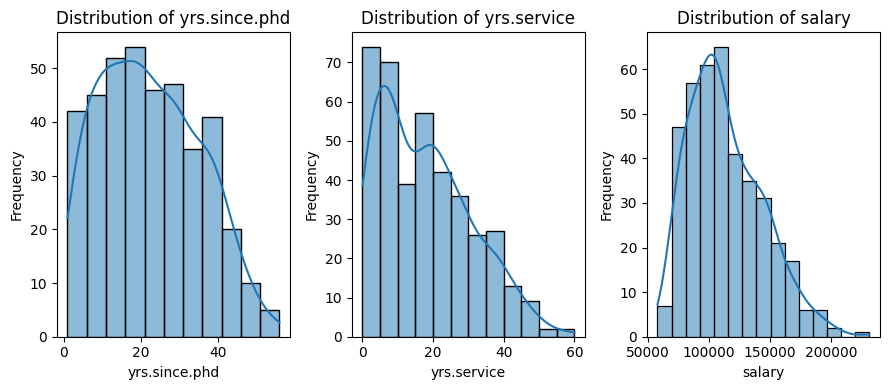

In [ ]:
numerical_cols = ['yrs.since.phd', 'yrs.service', 'salary']

fig, axes = plt.subplots(1, 3, figsize=(9, 4))

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df_salaries, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [ ]:
df_salaries[['yrs.since.phd', 'yrs.service', 'salary']].cov()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,166.074854,152.465085,1.636405e+05
yrs.service,152.465085,169.156655,1.318693e+05
salary,163640.549735,131869.303387,9.174259e+08


# Codificación de Elementos

In [ ]:
# Codificando los elementos
# Va a generar códigos para cada una de las columnas
# Asigna 1, 2, 3, etc. a los distintas categorías
# Muy útil para los próximos temas de ML
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_salaries_label_encoded = df_salaries.copy()

df_salaries_label_encoded['rank'] = label_encoder.fit_transform(df_salaries_label_encoded['rank'])
df_salaries_label_encoded['discipline'] = label_encoder.fit_transform(df_salaries_label_encoded['discipline'])
df_salaries_label_encoded['sex'] = label_encoder.fit_transform(df_salaries_label_encoded['sex'])

display(df_salaries_label_encoded.head())

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,2,1,19,18,1,139750
1,2,2,1,20,16,1,173200
2,3,1,1,4,3,1,79750
3,4,2,1,45,39,1,115000
4,5,2,1,40,41,1,141500


In [ ]:
rank_counts = df_salaries_label_encoded['rank'].value_counts()
discipline_counts = df_salaries_label_encoded['discipline'].value_counts()

rank_counts, discipline_counts

(rank
 2    266
 1     67
 0     64
 Name: count, dtype: int64,
 discipline
 1    216
 0    181
 Name: count, dtype: int64)

In [ ]:
display(df_salaries.head())

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df_salaries_label_encoded.corr()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
Unnamed: 0,1.000000,0.128209,-0.400216,0.208424,0.166314,0.080640,0.099583
rank,0.128209,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.400216,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.208424,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.166314,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.080640,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.099583,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


## Preguntas de Negocio


In [ ]:
average_salary_by_sex = df_salaries.groupby(['sex'])['salary'].mean()
print(average_salary_by_sex)

sex
Female    101002.410256
Male      115090.418994
Name: salary, dtype: float64


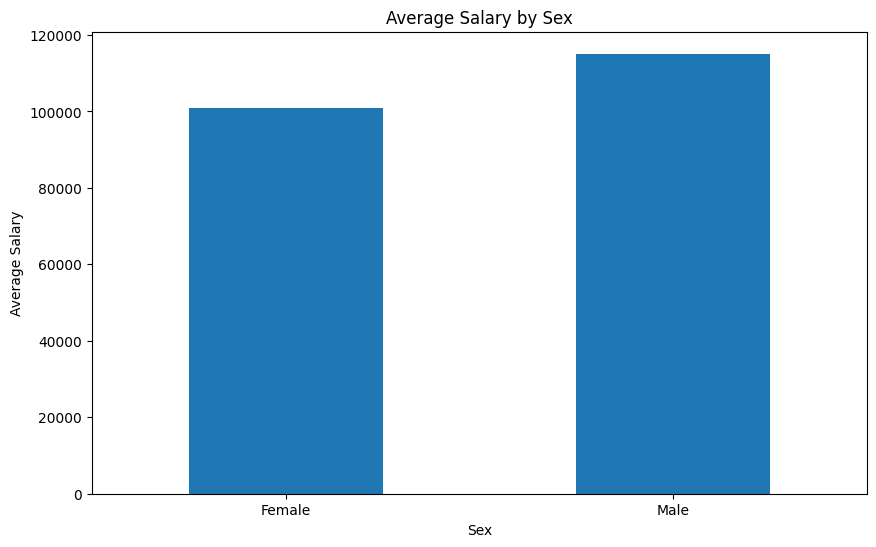

In [ ]:
average_salary_by_sex.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sex')
plt.ylabel('Average Salary')
plt.title('Average Salary by Sex')
plt.xticks(rotation=0)
plt.show()

In [ ]:
average_salary_by_sex_and_rank = df_salaries.groupby(['sex', 'rank'])['salary'].mean()
print(average_salary_by_sex_and_rank)

sex     rank     
Female  AssocProf     88512.800000
        AsstProf      78049.909091
        Prof         121967.611111
Male    AssocProf     94869.703704
        AsstProf      81311.464286
        Prof         127120.822581
Name: salary, dtype: float64


# Cuántos son?

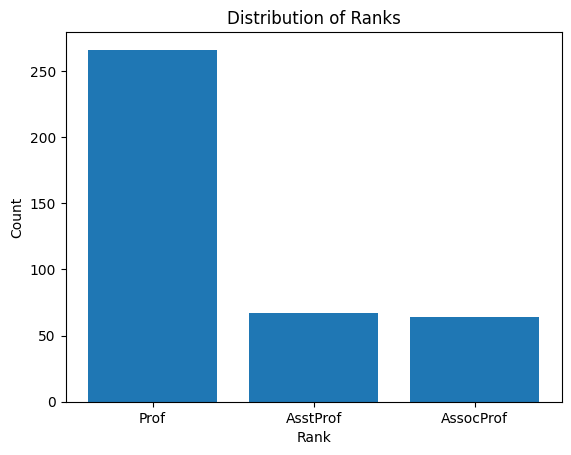

In [ ]:
# Get counts of original rank values
rank_counts_original = df_salaries['rank'].value_counts()

plt.bar(rank_counts_original.index, rank_counts_original.values)
plt.xlabel('Rank')
plt.ylabel('Count')
plt.title('Distribution of Ranks')
plt.show()

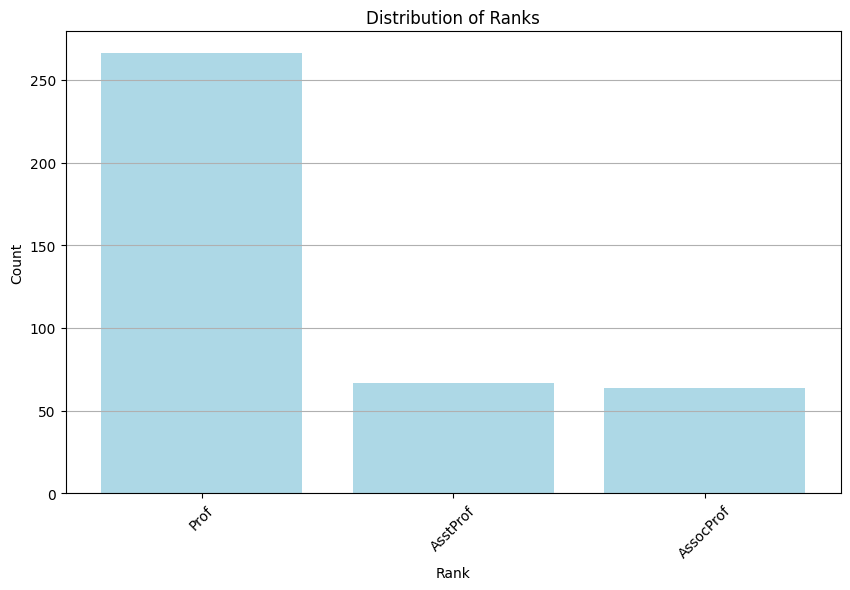

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(rank_counts_original.index, rank_counts_original.values, color = 'lightblue')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of Ranks')
plt.grid(axis='y')
plt.show()

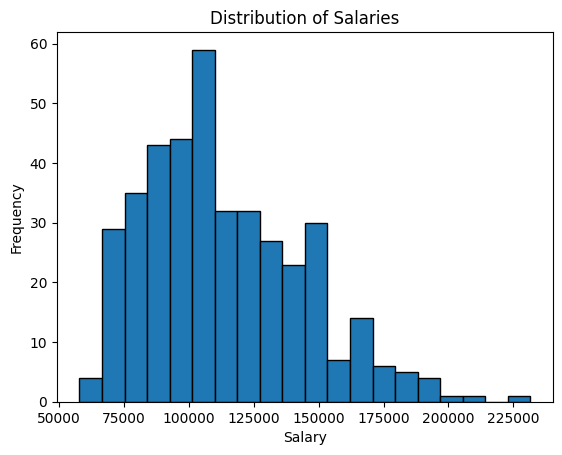

In [ ]:
plt.hist(df_salaries_label_encoded['salary'], bins=20, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

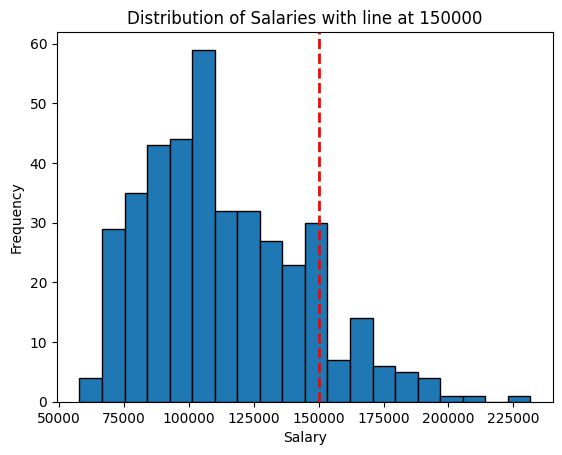

The probability of a salary surpassing 150000 is: 0.14


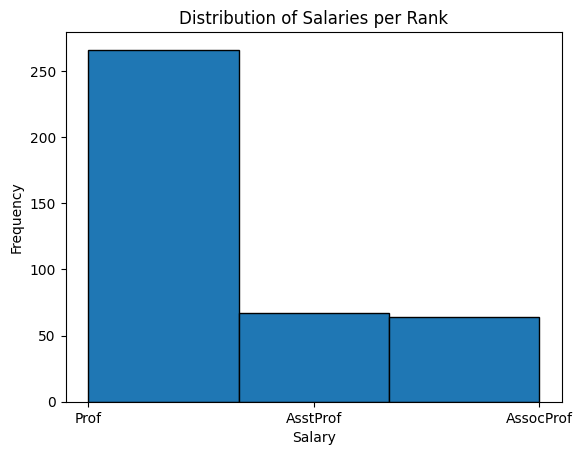

In [ ]:
# Salary per Rank
plt.hist(df_salaries['rank'], bins=3, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries per Rank')
plt.show()

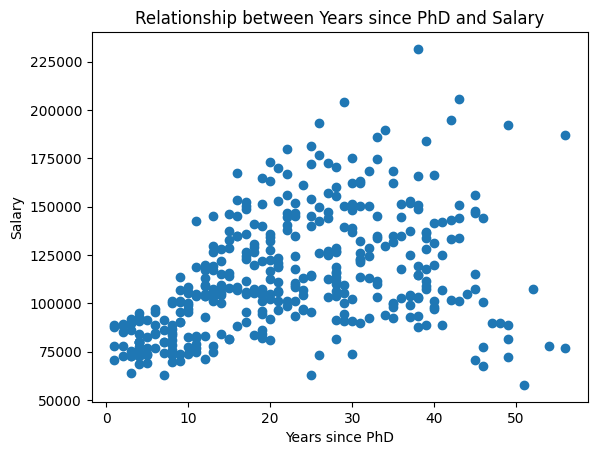

In [ ]:
# Scatterplots
plt.scatter(df_salaries_label_encoded['yrs.since.phd'], df_salaries_label_encoded['salary'])
plt.xlabel('Years since PhD')
plt.ylabel('Salary')
plt.title('Relationship between Years since PhD and Salary')
plt.show()

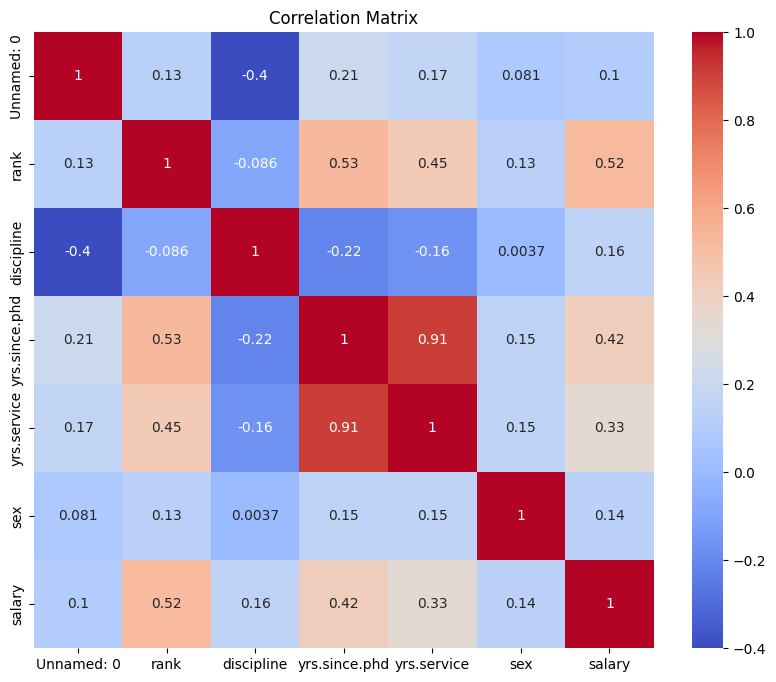

In [ ]:
# Correlation Matrix
correlation_matrix = df_salaries_label_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

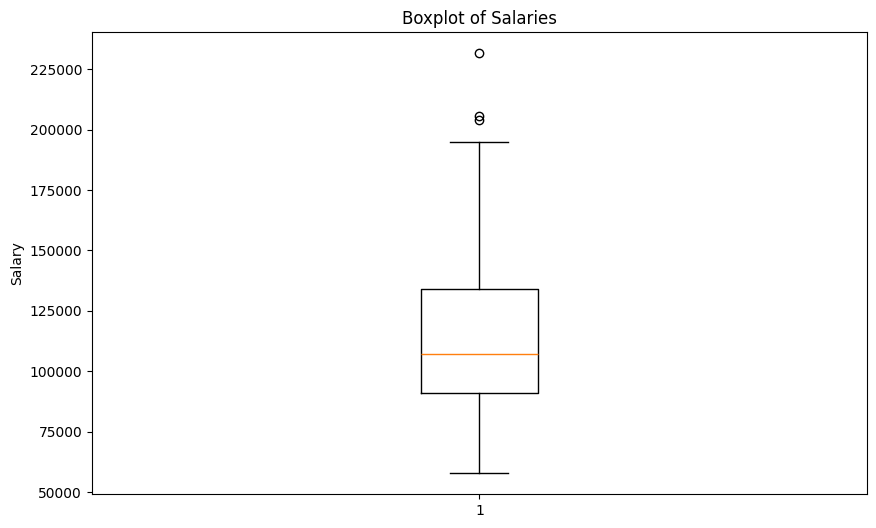

In [ ]:
#boxplot de salarios
plt.figure(figsize=(10, 6))
plt.boxplot(df_salaries_label_encoded['salary'])
plt.ylabel('Salary')
plt.title('Boxplot of Salaries')
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

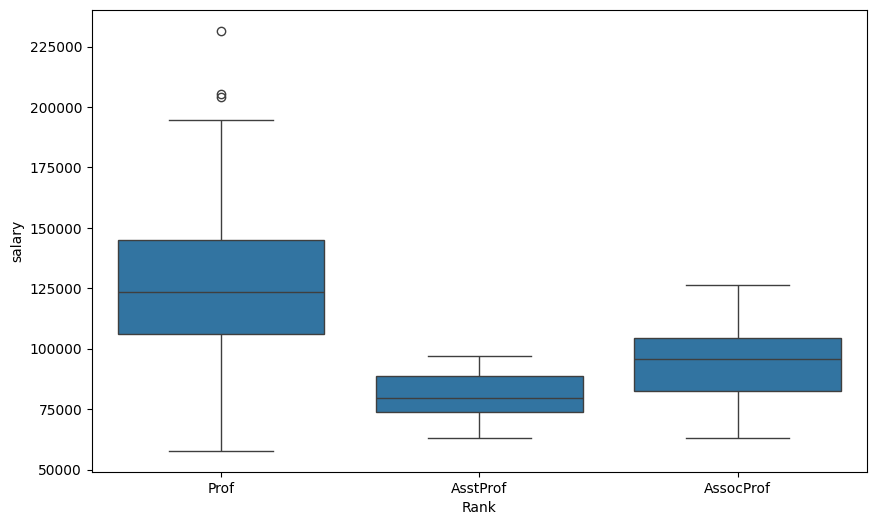

In [ ]:
# boxplot de salarios por rank

plt.figure(figsize=(10, 6))
sns.boxplot(x='rank', y='salary', data=df_salaries)
plt.xlabel('Rank')
plt

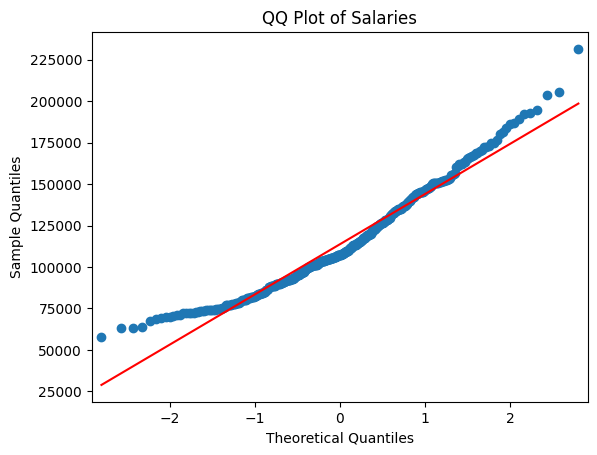

In [ ]:
# qq plot de salario
import statsmodels.api as sm

sm.qqplot(df_salaries['salary'], line='s')
plt.title('QQ Plot of Salaries')
plt.show()

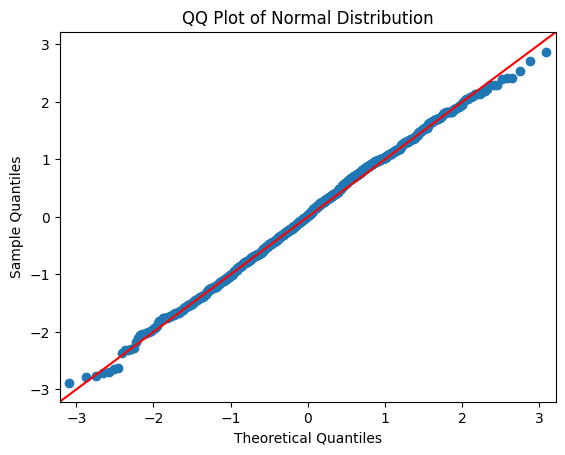

In [ ]:
muestra_normal = np.random.normal(0, 1, 1000)
sm.qqplot(muestra_normal, line='45')
plt.title('QQ Plot of Normal Distribution')
plt.show()